# Avacado Prices : Descriptive Analysis
---

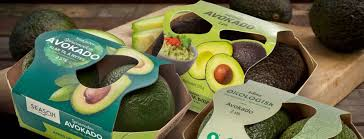

The dataset represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. The Average Price (of avocados) in the data reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- `Date` - The date of the observation
- `AveragePrice` - the average price of a single avocado
- `type` - conventional or organic
- `year` - the year
- `Region` - the city or region of the observation
- `Total Volume` - Total number of avocados sold
- `4046` - Total number of avocados with PLU 4046 sold
- `4225`- Total number of avocados with PLU 4225 sold
- `4770` - Total number of avocados with PLU 4770 sold

### Pre-processing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # standard graphics
import seaborn as sns # fancier graphics

In [2]:
# Read the dataset
data = pd.read_csv('/content/Avocado.csv') #path of the csv file - if file present in same diectory then simply write the name

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
# Show the first rows
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
#show the last five rows
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


### Clean the data

The first column is an index, so drop it out

In [6]:
data = data.drop(columns = 'Unnamed: 0')
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


What are 4046, 4225 and 4770?

Reading of avocado varieties: https://producebrands.com/the-avocado/ gives explanations:
- 4046 = Hass – small
- 4225 = Hass – large
- 4770 = Hass Extra Large

We rename the columns accordingly.


In [8]:
data = data.rename(columns = {'4046': 'small', '4225': 'large', '4770': 'xl'})
data.head()

,Date,AveragePrice,Total Volume,small,large,xl,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
# Show the last rows
data.tail()

,Date,AveragePrice,Total Volume,small,large,xl,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


---

# Descriptive Statistics

In [10]:
# rows, columns
data.shape

(18249, 13)

In [11]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'small', 'large', 'xl',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [12]:
data.isnull().sum()

,0
Date,0
AveragePrice,0
Total Volume,0
small,0
large,0
xl,0
Total Bags,0
Small Bags,0
Large Bags,0
XLarge Bags,0


In [13]:
# col - numerical - mean value to replace with missing values
# col - categorical - mode value will replace the missing value

This indicates none of the columns have missing values

In [14]:
# Show the descriptive statistics using describe()

data.describe()

,AveragePrice,Total Volume,small,large,xl,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [15]:
# What is the mean AveragePrice? (notice that there is a column of named 'AveragePrice')

data['AveragePrice'].mean()

1.405978409775878

In [16]:
### Print the mean with two decimals only
#Hint: use round() - build in function to get round figures - number, upto which decimal

m = data['AveragePrice'].mean()
print('Mean value of AveragePrice = ', round(m,2))

Mean value of AveragePrice =  1.41


In [17]:
# What is the standard deviation of Average Price?

s = data['AveragePrice'].std()
print('Standard Deviation of AveragePrice = ', round(m,2))

Standard Deviation of AveragePrice =  1.41


In [18]:
# Printing the standard deviation of Average Price with two decimals only
# print('Standard deviation of Average Price = ',round(s,2)).

If we compare the `data.head()` and `data.describe()`, we notice that 'type' and 'region' columns were dropped out from the descriptive statistics table as they were text (or categorical data). However, we can study how many unique values these variables contain and the distribution of the values.

In [19]:
# What are the unique type values?

data['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [20]:
# How many rows i.e., observations there are for each type?

data['type'].value_counts()

,count
type,
conventional,9126
organic,9123


In [22]:
# Display the descriptive statistics grouped by 'type'

data.groupby('type').describe()

AveragePrice                                                    \
                    count      mean       std   min   25%   50%   75%   max   
type                                                                          
conventional       9126.0  1.158040  0.263041  0.46  0.98  1.13  1.32  2.22   
organic            9123.0  1.653999  0.363502  0.44  1.42  1.63  1.87  3.25   

             Total Volume                ... XLarge Bags               year  \
                    count          mean  ...         75%        max   count   
type                                     ...                                  
conventional       9126.0  1.653213e+06  ...    2409.215  551693.65  9126.0   
organic            9123.0  4.781121e+04  ...       0.000     510.41  9123.0   

                                                                             
                     mean       std     min     25%     50%     75%     max  
type                                                                         
conventional  2016.147929  0.939968  2015.0  2015.0  2016.0  2017.0  2018.0  
organic       2016.147868  0.939961  2015.0  2015.0  2016.0  2017.0  2018.0  

[2 rows x 80 columns]

In [23]:
# Display the descriptive statistics for 'AveragePrice' grouped by 'type'

data_by_type = data.groupby('type')
data_by_type['AveragePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
conventional,9126.0,1.158040,0.263041,0.46,0.98,1.13,1.32,2.22
organic,9123.0,1.653999,0.363502,0.44,1.42,1.63,1.87,3.25


In [24]:
# Compare the mean of AveragePrice between different types?

data['AveragePrice'].groupby(data['type']).mean()

,AveragePrice
type,
conventional,1.158040
organic,1.653999


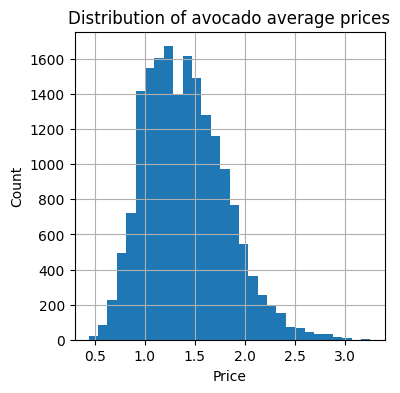

In [25]:
# Show the distribution of the average prices using Histogram? (Hint: use bins = 30)

data.hist(column = 'AveragePrice', bins = 30, figsize = (4,4))
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of avocado average prices')
plt.show()

<Figure size 500x500 with 0 Axes>

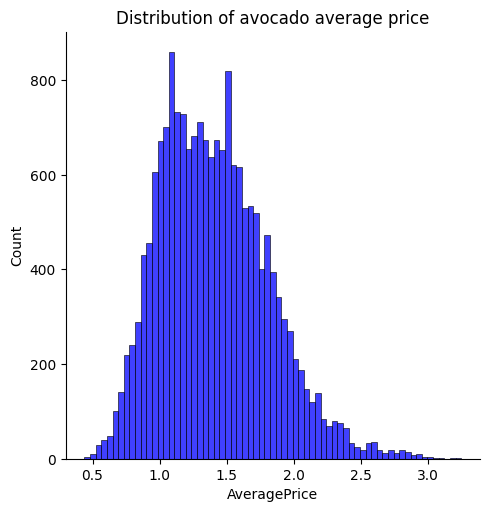

In [26]:
# Use a seaborn to create distribution plot of 'AveragePrice'

plt.figure(figsize=(5,5))
ax = sns.displot(data["AveragePrice"], color = 'b')
plt.title("Distribution of avocado average price")
plt.show()



If we observe the distribution closely, it seems that we have two peaks in our distribution. Could this be due to different avocado types?

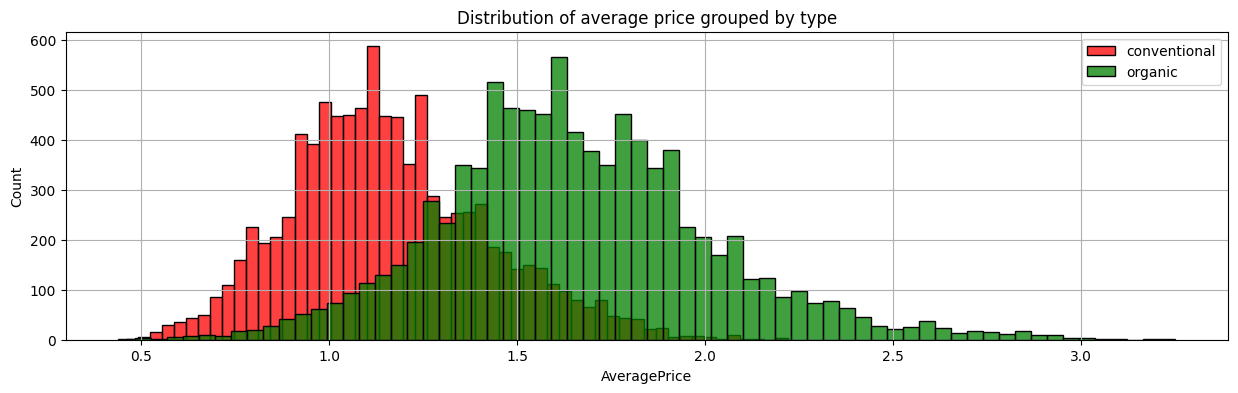

In [27]:
# Can we overlay the distribution of average price grouped by type?
#Hint: plot two distribution plot using seaborn for each type in a single figure

#set figure size
plt.figure(figsize=(15,4))

# Plot the distribution of conventional type data
sns.histplot(data["AveragePrice"][data['type'] == 'conventional'], color = 'r', label = 'conventional')
sns.histplot(data["AveragePrice"][data['type'] == 'organic'], color = 'g', label = 'organic')

# add legend, show the graphics
plt.legend()
plt.grid()
plt.title("Distribution of average price grouped by type")
plt.show()

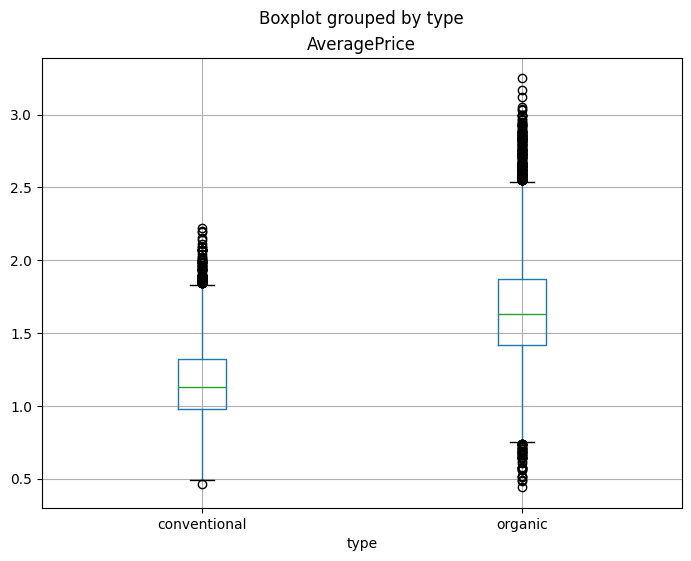

In [28]:
# Make a boxplot graph using pandas or seaborn to compare 'Avrage Price' by 'type'

#boxplot using pandas
data.boxplot(column = 'AveragePrice', by = 'type', figsize = (8,6))
plt.show()

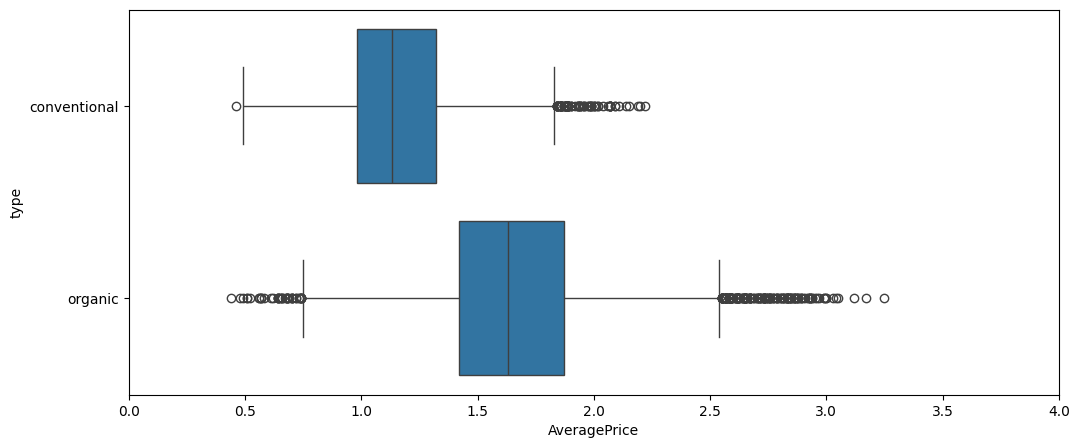

In [29]:
# boxplot with seaborn

plt.figure(figsize=(12,5))
sns.boxplot(y = "type", x = "AveragePrice", data = data)
plt.xlim([0, 4])
plt.show()